# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


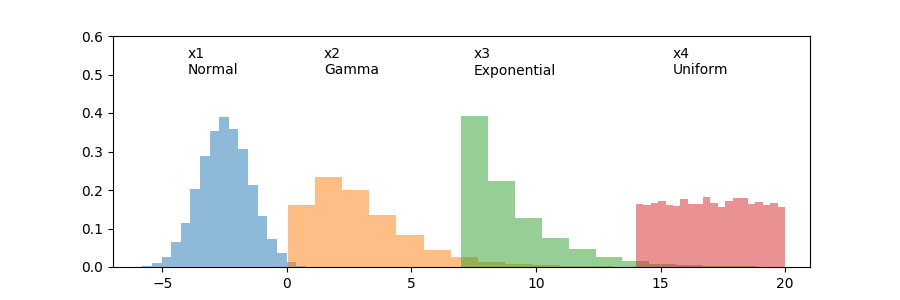

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


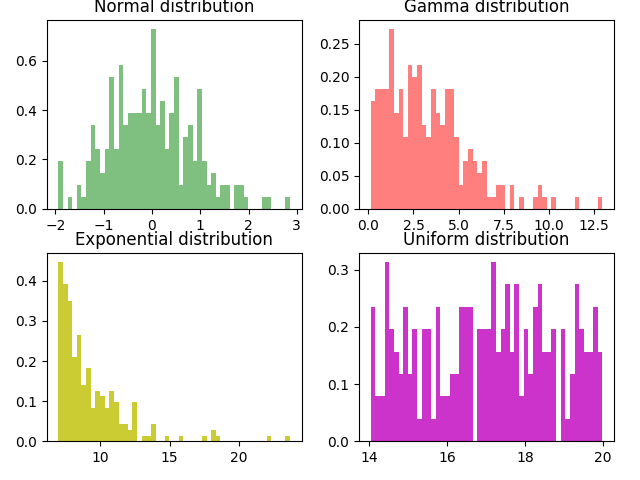

<IPython.core.display.Javascript object>


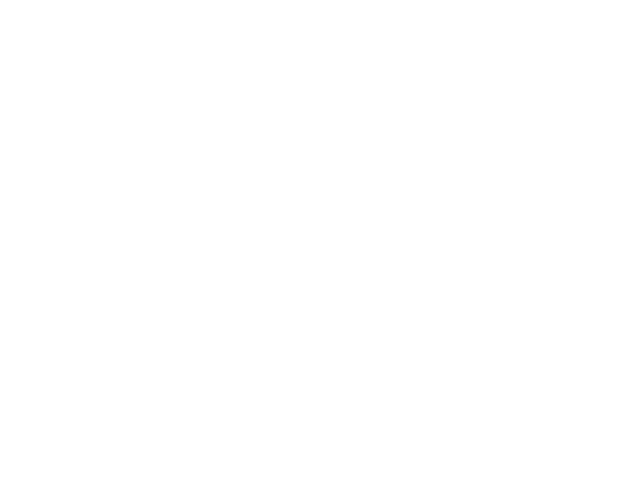

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout()

def updateData(curr):
    if curr == 30: 
        a.event_source.stop()
    for ax in (ax1, ax2, ax3, ax4):
        ax.clear()
    ax1.hist(x1[:curr], normed=True, bins=50, alpha=0.5, facecolor='g')
    ax1.set_title('Normal distribution')
    ax2.hist(x2[:curr], normed=True, bins=50, alpha=0.5, facecolor='r')
    ax2.set_title('Gamma distribution')
    ax3.hist(x3[:curr], normed=True, bins=50, alpha=0.8, facecolor='y')
    ax3.set_title('Exponential distribution')
    ax4.hist(x4[:curr], normed=True, bins=50, alpha=0.8, facecolor='m')
    ax4.set_title('Uniform distribution')
    #ax.annotate('n = {}'.format(curr), [19,0.55])
    

fig = plt.figure()
a = anim.FuncAnimation(fig, updateData, interval=50, repeat=False)

<IPython.core.display.Javascript object>


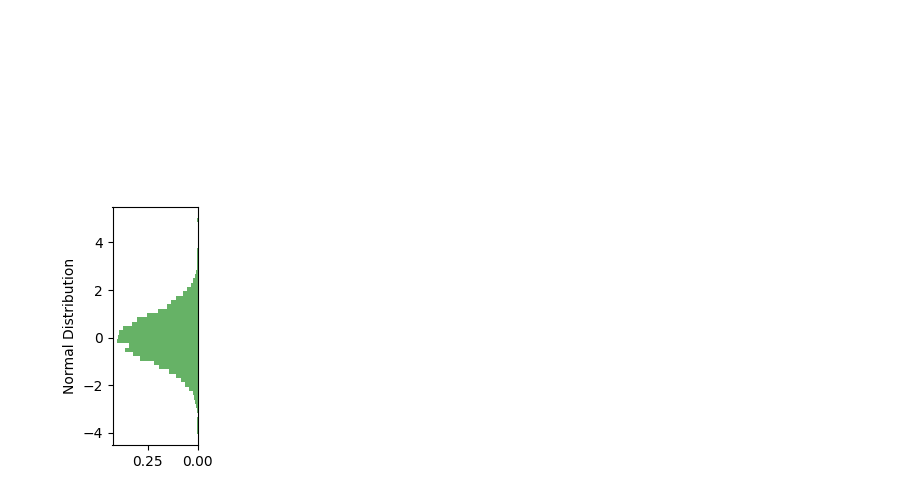

<IPython.core.display.Javascript object>


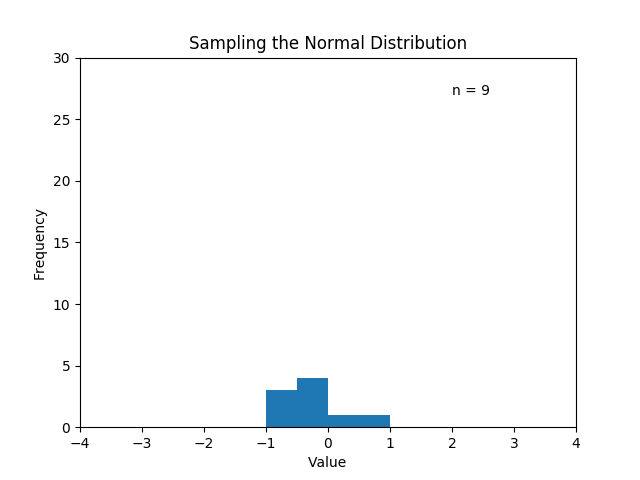

'"\nx1 = np.random.normal(0, 1, 10000)\nx2 = np.random.gamma(2, 1.5, 10000)\nx3 = np.random.exponential(2, 10000)+7\nx4 = np.random.uniform(0, 7, 10000)\n\nplt.figure(figsize=(9,5))\ngspec = gridspec.GridSpec(3, 5)\n\ntop_histogram = plt.subplot(gspec[0, 1:4])\nleftside_histogram = plt.subplot(gspec[1:, 0:1])\ncenter_histogram = plt.subplot(gspec[1:, 1:4])\nrightside_histogram = plt.subplot(gspec[1:, 4:])\n\ncenter_histogram.hist(x4, normed=True, bins=50, alpha=0.8)\ntop_histogram.hist(x2, normed=True, bins=50, color=\'orange\', alpha=0.8)\nleftside_histogram.hist(x1, normed=True, bins=50, orientation=\'horizontal\', color=\'green\', alpha=0.6)\nrightside_histogram.hist(x3, normed=True, bins=50, orientation=\'horizontal\', color=\'red\', alpha=0.6)\nleftside_histogram.invert_xaxis()\nrightside_histogram.invert_xaxis()\n\ngspec.update(wspace=0.8, hspace=0.6)\n\ncenter_histogram.set_title(\'Uniform Distribution\')\ntop_histogram.set_title(\'Gamma Distribution\')\nleftside_histogram.set_y

In [3]:
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation


x1 = np.random.normal(0, 1, 10000)
#x2 = np.random.gamma(2, 1.5, 10000)

plt.figure(figsize=(9,5))
gspec = gridspec.GridSpec(3, 5)

leftside_histogram = plt.subplot(gspec[1:, 0:1])

leftside_histogram.hist(x1, normed=True, bins=50, orientation='horizontal', color='green', alpha=0.6)

leftside_histogram.invert_xaxis()

gspec.update(wspace=0.8, hspace=0.6)

leftside_histogram.set_ylabel('Normal Distribution')

def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 100: 
        a.event_source.stop()
    plt.cla()
    #plt.hist(x1[:curr], normed=True, bins=50, orientation='horizontal', color='green', alpha=0.6)
    #plt.gca().invert_xaxis()
    #plt.axis([-4,4,0,30])
    
    
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x1[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [2,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

""""
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(0, 7, 10000)

plt.figure(figsize=(9,5))
gspec = gridspec.GridSpec(3, 5)

top_histogram = plt.subplot(gspec[0, 1:4])
leftside_histogram = plt.subplot(gspec[1:, 0:1])
center_histogram = plt.subplot(gspec[1:, 1:4])
rightside_histogram = plt.subplot(gspec[1:, 4:])

center_histogram.hist(x4, normed=True, bins=50, alpha=0.8)
top_histogram.hist(x2, normed=True, bins=50, color='orange', alpha=0.8)
leftside_histogram.hist(x1, normed=True, bins=50, orientation='horizontal', color='green', alpha=0.6)
rightside_histogram.hist(x3, normed=True, bins=50, orientation='horizontal', color='red', alpha=0.6)
leftside_histogram.invert_xaxis()
rightside_histogram.invert_xaxis()

gspec.update(wspace=0.8, hspace=0.6)

center_histogram.set_title('Uniform Distribution')
top_histogram.set_title('Gamma Distribution')
leftside_histogram.set_ylabel('Normal Distribution')
rightside_histogram.set_ylabel('Exponential Distribution')
"""

<IPython.core.display.Javascript object>


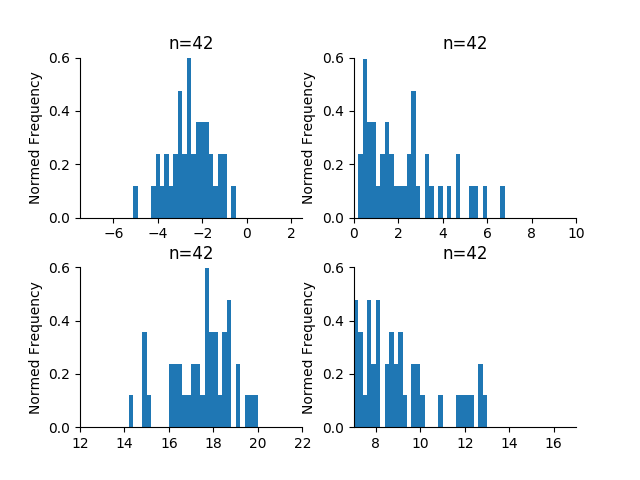

In [9]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

x = [x1, x2, x3, x4]

bins1 = np.arange(-7.5, 2.5, 0.2)
bins2 = np.arange(0, 10, 0.2)
bins3 = np.arange(7, 17, 0.2)
bins4 = np.arange(12, 22, 0.2)

bins = [bins1, bins2, bins3, bins4]

axis1 = [-7.5, 2.5, 0, 0.6]
axis2 = [0, 10, 0, 0.6]
axis3 = [7, 17, 0, 0.6]
axis4 = [12, 22, 0, 0.6]

axis = [axis1, axis2, axis3, axis4]

import matplotlib.gridspec as gridspec

gspec = gridspec.GridSpec(4, 4)
plt.figure()
ax1 = plt.subplot(gspec[0:2, 0:2])
ax2 = plt.subplot(gspec[0:2, 2:])
ax3 = plt.subplot(gspec[2:, 2:])
ax4 = plt.subplot(gspec[2:, 0:2])
ax = [ax1, ax2, ax3, ax4] 
for a in ax:
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
gspec.update(wspace = .6, hspace = .9)

def update(curr):
    if curr == 100:
        a.event_source.stop()
    for i in range(len(ax)):
        ax[i].cla()
        ax[i].hist(x[i][:curr], normed = True, bins = bins[i])
        ax[i].axis(axis[i])
        ax[i].set_title('n={}'.format(curr))
        ax[i].set_ylabel('Normed Frequency')
#    plt.tight_layout()

fig = plt.gcf()    
a = animation.FuncAnimation(fig, update, interval = 10)

<IPython.core.display.Javascript object>


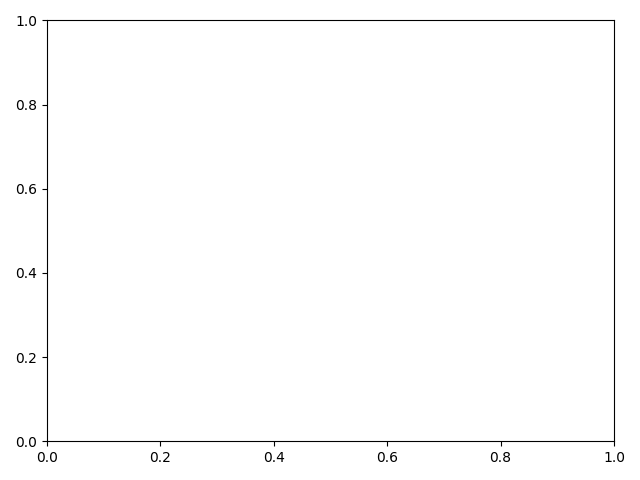

<IPython.core.display.Javascript object>


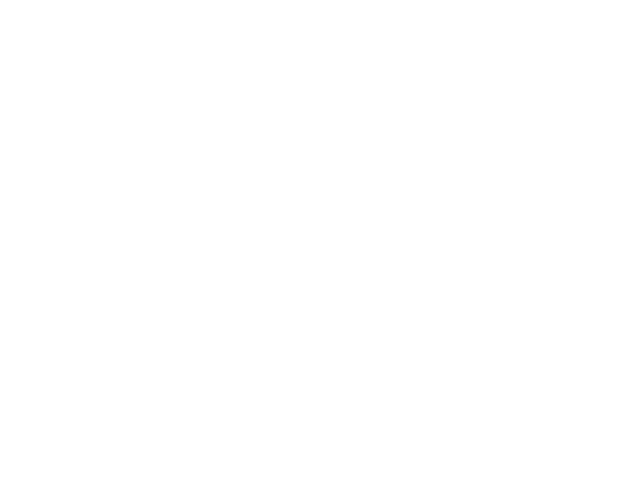

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

fig, (ax1) = plt.subplots(1, 1)
fig.tight_layout()

def updateData(curr):
    if curr == 100: 
        a.event_source.stop()
    for ax in (ax1):
        ax.clear()
        
    ax1.hist(x1[:curr], normed=True, bins=50, alpha=0.5, facecolor='g')
    ax.annotate('n = {}'.format(curr), [19,0.55])
    

fig = plt.figure()
a = anim.FuncAnimation(fig, updateData, interval=50, repeat=False)